# Part II - (Presentation Title)
## by Ammar Ramadan

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> These visualisations focues more on the status of the borrower and how they are likely to pay their debts and other factors that influence their ability to pay or the amount of their loans.

## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> Loan Data from Prosper
This data set contains 113,937 loans with 81 variables on each loan,
Here are the explanation of some variables.

> `BorrowerRate`: The interest rate the borrower will pay.<p>
`EmploymentStatus` The employment status of the borrower. wether he's employed, , full time etc.<p>
`EstimatedLoss`: This shows the estimation of the money that the bank would lose if borrower didn't pay.<p>
`LoanStatus`: Wether it's Completed, Cancelled, Charged off, Defaulted ... etc.<br>
 The diffrence between `Chargedoff` and `defaulted` is that `defaulted` means that borrower has missed one or more payments `Chargedoff` happens after a default when a borrower doesn't pay his debt.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
# My own code
from wrangle_data import wrangle_data

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("data/prosperLoanData.csv")

#wrangle data (You can find the function details in wrangle_data.py)
wrangle_data(df)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,InterestAmount,LoanStatusSummarized,BorrowerStatus,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,1.0,0,0,0.0,258,1489.150,Completed,Good,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,1.0,0,0,0.0,1,920.000,Current,Good,Home
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,1.0,0,0,0.0,41,825.275,Completed,Good,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,1.0,0,0,0.0,158,974.000,Current,Good,Large Purchases
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,1.0,0,0,0.0,20,3127.500,Current,Good,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,1.0,0,0,0.0,1,1864.000,Current,Good,Debt Consolidation
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,1.0,0,0,0.0,22,222.000,Current,Good,Auto
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,1.0,0,0,0.0,119,2150.000,Current,Good,Debt Consolidation
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,1.0,0,0,0.0,274,3907.500,Completed,Good,Home


## (Visualization 1)

> The plot shows us that most people are in the progress of paying their loans.<br>
A good proportion of borrowers completed their loans. A few people paid their debts but late<br>
People who are chargedoff are more than those who are defaulted. this might means that if borrowers get defaulted he is more likely to be chargedoff after the default.

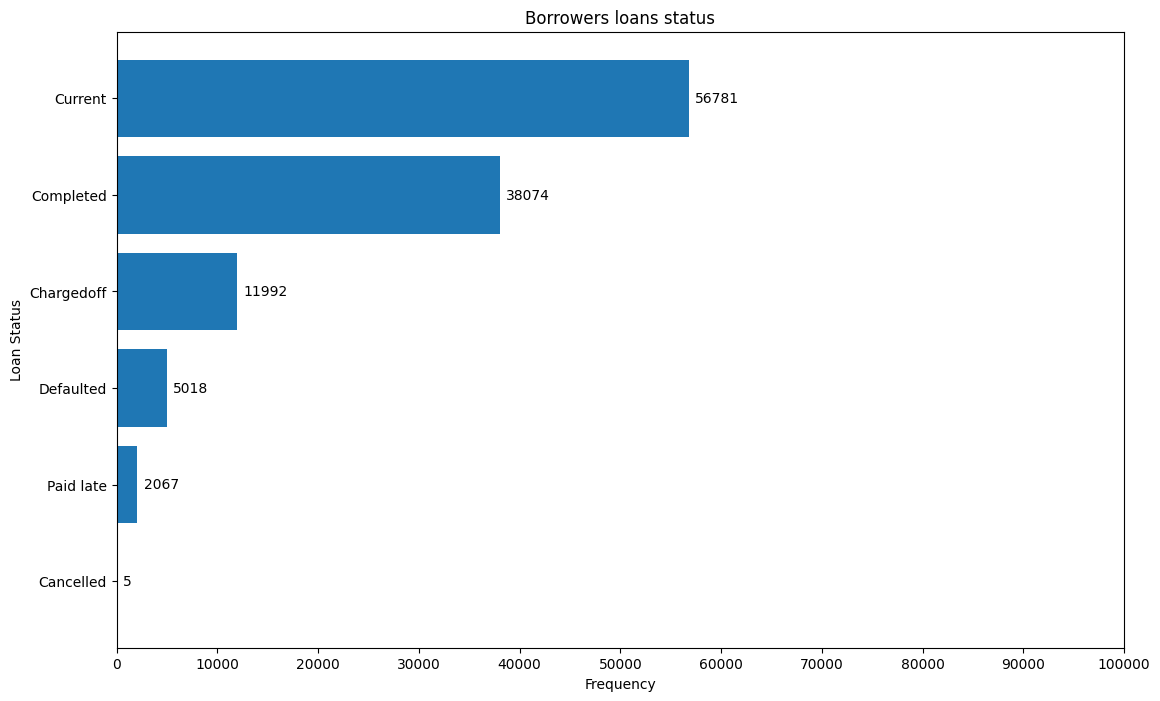

In [3]:
plt.figure(figsize=(13,8))

# Use this variable to change the scale of the plot
scale_value = 0.5

values = df["LoanStatusSummarized"].value_counts().reset_index(name="count")
values["count"] *= scale_value

plt.barh(data=values, y='LoanStatusSummarized', width='count')

# Matplotlib plots values in accending order lower value at top and highest at bottom which is not desired so we invert the order
plt.gca().invert_yaxis()

ticks_x = np.arange(0, 50_000+1, 5_000) 
plt.xticks(ticks_x, (ticks_x / scale_value).astype(int))

# Show text
for i, v in enumerate(values["count"]):
    # multiply v * 2 as we devided it by 2 earlier
    plt.text(v+300, i, int(v / scale_value), ha='left', va='center')

plt.title("Borrowers loans status")
plt.xlabel("Frequency")
plt.ylabel("Loan Status");

## (Visualization 2)

> The plot clearly shows us that employed people are the one who take the largest amount of loan.<br>
Part time are the one who take the least amount of loan.<br>
`Non employed`, `Part-time`, `Full-time` and `Retired` borrowers who messed up take more loans than those who paid on time.<br>


Text(0, 0.5, 'Loan amount')

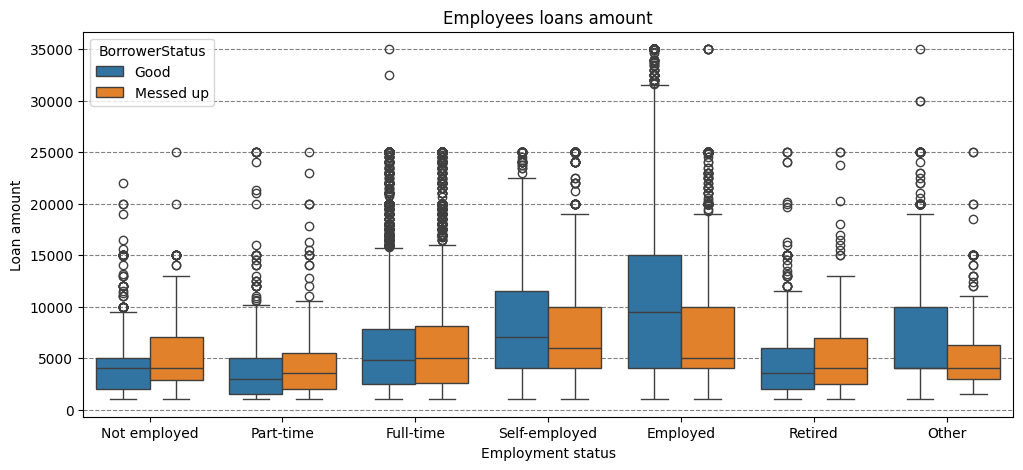

In [4]:
# Make the plot bigger so the xticks doesn't overlap
plt.figure(figsize=(12,5))


order = ["Not employed", "Part-time", "Full-time", "Self-employed", "Employed", "Retired", "Other"]
ax = sns.boxplot(data=df, x="EmploymentStatus", y="LoanOriginalAmount" ,hue="BorrowerStatus", order=order);

# Add y grid
ax.yaxis.grid(color='grey', linestyle='dashed')
# Make boxplots elements above the grid
ax.set_axisbelow(True)

plt.title("Employees loans amount")
plt.xlabel("Employment status")
plt.ylabel("Loan amount")

## (Visualization 3)

> The plot shows us that the more interest rate the more likely the borrower won't pay his debt.<br>
Weirdly the more income the borrower have to pay less interest rate.<br>
We can conclude that interest rate is bad for borrowers.

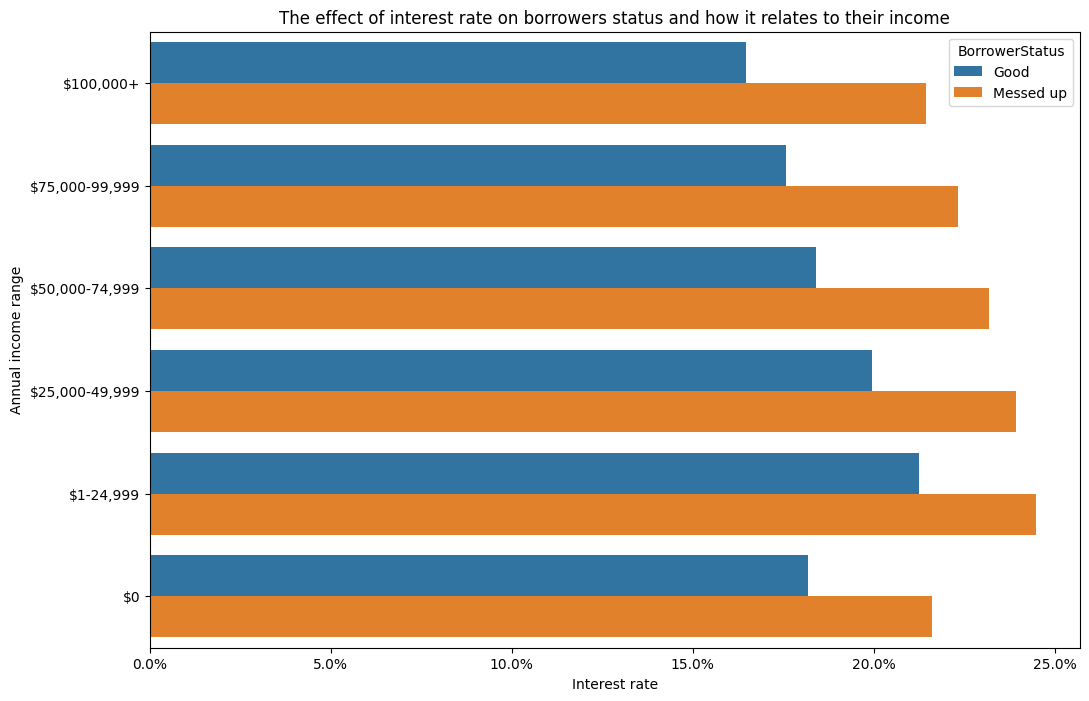

In [5]:
# Make plot bigger because legend hides content
plt.figure(figsize=(12,8))

# Get rid of the `Not displayed` and `Not employed` categories.
order  = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
order.reverse()  # use reverse so it plots the income range in the order of the y axis

ax = sns.barplot(data=df, y="IncomeRange", x="BorrowerRate", hue="BorrowerStatus", errorbar=None, order=order);

plt.xlabel("Interest rate")
plt.ylabel("Annual income range")
plt.title("The effect of interest rate on borrowers status and how it relates to their income");

# Add `%` symbol to the x ticks
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))


## (Visualisation 4)

> The plot shows us that the more the borrower rate the bank estimate higher loss from this loan and the borrower is more likely to fail paying his debts.<br>
Most people usually borrow what ranges from \\$100 to \\$10,000.<br>
The larger the loan the less the interest rate is and the less the people who borrow.
to make it obvious there is no people who borrowed more than \\$20,000 and got interest rate above 30%.<br>
The relation between loan amount and interest rate is similar to loan amount and estimated loss.

Text(0.5, 0.98, '')

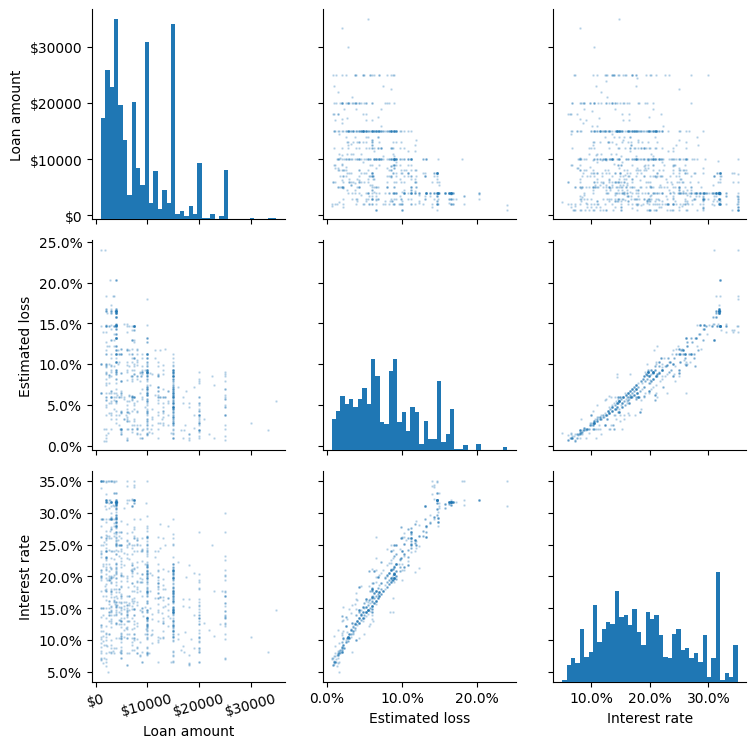

In [8]:
# Those are the categories that we will plot
stats = ["LoanOriginalAmount", "EstimatedLoss", "BorrowerRate"]
g = sns.PairGrid(data=df.sample(1000), vars=stats)
g.map_offdiag(plt.scatter, alpha=0.2, s=0.8)
g.map_diag(plt.hist, bins=40);

# get desired axes that needs to be formatted

# Format x axes and add the `%` symbol for estimated loss and borrower rate and add labels
for i in g.axes[2, 1:3]:
    i.xaxis.set_major_formatter(mtick.PercentFormatter(1))    

# Format loan amount on the y axis
g.axes[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter("$%.0f"))

# Format the y axes too for estimated loss and borrower rate
for i in g.axes[1:3,0]:
    i.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Format the loan amount on the x axis and add rotation
g.axes[2,0].set_xticklabels(g.axes[2,0].get_xticks(),rotation=15);
g.axes[2,0].xaxis.set_major_formatter(mtick.FormatStrFormatter("$%.0f"))

#Add labels
labels = ["Loan amount", "Estimated loss", "Interest rate"]

# Add xlabels
for i, v in enumerate(g.axes[2]):
    v.set_xlabel(labels[i])

# Add ylabels
for i, v in enumerate(g.axes[0:3,0]):
    v.set_ylabel(labels[i])

plt.suptitle("")